In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>


# Confidence Intervals

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>


## Normal Distributions

Recall that a **normal distribution** $N(\mu,\sigma)$ with mean $\mu$ and standard deviation $\sigma$ is defined by the below probability density function. 

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} 𝑒^{−\frac{(x-\mu)^{2}}{2\sigma^{2}}}$

The **standard normal distribution** has $\mu =0$ and $\sigma = 1$. 

If random variable $x$ is normally distributed, then the following hold.  

*  $Pr(\mu-1\sigma \leq x \leq \mu+1\sigma) \approx 68\%$
*  $Pr(\mu-1.65\sigma \leq x \leq \mu+1.65\sigma) \approx 90\%$
*  $Pr(\mu-1.96\sigma \leq x \leq \mu+1.96\sigma) \approx 95\%$
*  $Pr(\mu-2.33\sigma \leq x \leq \mu+2.33\sigma) \approx 98\%$
*  $Pr(\mu-2.58\sigma \leq x \leq \mu+2.58\sigma) \approx 99\%$
*  $Pr(\mu-3\sigma \leq x \leq \mu+3\sigma) \approx 100\%$

In other words, roughly 95% of values of $x$ are within 2 standard deviations of the mean.  For the standard normal distribution, the values of the random variable are called **standard scores** or **z-scores**.  For a normal distribution with $\mu \neq 0$ and/or $\sigma \neq 1$, we can convert values of the random variable to a corresponding z-score. by subtacting $\mu$ and then dividing by $\sigma$. 

$𝑧= \frac{(𝑥−\mu)}{\sigma}$

We can easily create a (continuous) normal distribtion in Python using a `scipy.stats` and plot the distribution using it's probability density function `pdf`.

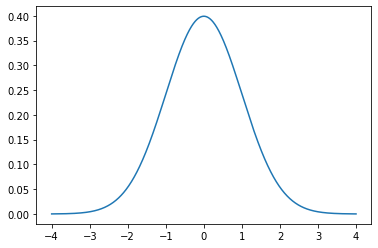

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
y = norm(loc=0, scale=1) # create a normal distribution with mu=0 and std=1
x = np.linspace(-4, 4, 1000) # generate 1000 points between 50 and 150, equally separated. 
plt.plot(x, y.pdf(x), '-') # plot x vs pdf of x. 


We can use the cumulative probability method `cdf` to check some of the assertions above. 

In [2]:
for x in [1,1.65,1.96,2.33, 2.58, 3,4]:
    print(f'Probability of +/- {x} sigma: \t{y.cdf(x) - y.cdf(-x):.3f}')

Probability of +/- 1 sigma: 	0.683
Probability of +/- 1.65 sigma: 	0.901
Probability of +/- 1.96 sigma: 	0.950
Probability of +/- 2.33 sigma: 	0.980
Probability of +/- 2.58 sigma: 	0.990
Probability of +/- 3 sigma: 	0.997
Probability of +/- 4 sigma: 	1.000


## Central Limit Theorem

If we take multiple samples of size $n$ from a population $P$ with mean $\mu$ and standard deviation $\sigma$, then: 

*  **The means of the samples will be approximately normally distributed.**
*  **The mean of the sample means is $\mu$.**
*  **The standard deviation of the sample means is $\frac{\sigma}{\sqrt{n}}$**.


## Confidence Intervals (for known $\sigma$)

Given the above, if $m$ is the mean of a sample taken from that population, then 90% of the time, $\mu$ is $m \pm 1.65 \frac{\sigma}{\sqrt{n}}$.

* 90% of the time, $m$ is $\leq 1.65 \frac{\sigma}{\sqrt{n}}$ units away from $\mu$.

* 90% of the time, $\mu$ is $\leq 1.65 \frac{\sigma}{\sqrt{n}}$ units away from $m$.

* 90% of the time, $\mu$ is $\leq m \pm 1.65 \frac{\sigma}{\sqrt{n}}$.

$m \pm 1.65 \frac{\sigma}{\sqrt{n}}$ constitutes a 90% **confidence interval** for the true mean $\mu$ of the population. 

If we took another sample, we’d have a different sample mean $m$ and so possibly get a different interval. However, if we repeatedly generated samples, roughly 90% of the intervals would contain $\mu$. 

The % is called the **confidence level**. For each, there is an associated z-score. 

*  68% Confidence Interval: z = 1
*  90% Confidence Interval: z = 1.65
*  95% Confidence Interval: z =1.96
*  98% Confidence Interval: z = 2.33 
*  99% Confidence Interval: z = 2.58

So, for a given $z$ and sample mean $m$, the corresponding confidence interval is

$m \pm z \frac{\sigma}{\sqrt{n}}$

Note that as $z$ increases, the interval *increases* in size.  E.g., how certain are we that $\mu$ is in $(-\infty,\infty)$? Answer: We're 100% certain.


### Example

Calculate a  95% confidence interval for the population mean $𝜇$, given: 
*  a sample of size 30;
*  a sample mean of 1050; and 
*  a Population standard deviation ($𝜎$) of 100.2.

From the above, we know that $\mu$ is $1050 \pm 1.96\frac{100.2}{\sqrt{30}}$.

In [3]:
import math

sample_size = 30
sample_mean = 1050
pop_std = 100.2
z = 1.96

def confidence(sample_size, sample_mean, pop_std, z):
    mu_lower = sample_mean - z * pop_std/math.sqrt(sample_size)
    mu_higher = sample_mean + z * pop_std/math.sqrt(sample_size)
    return (mu_lower,mu_higher)

result = confidence(sample_size, sample_mean, pop_std, z)
print(result)

(1014.1438904954819, 1085.8561095045181)


We can also compute the interval using `stats.norm`. Below, we provide the confidence level ($0.95$), the mean ($1050$), and the standard deviation ($\sigma/\sqrt{30}$).  

In [4]:
from scipy.stats import norm
sigma = pop_std/math.sqrt(sample_size)
norm.interval(0.95, loc=sample_mean, scale=pop_std/math.sqrt(sample_size))

(1014.1445493599082, 1085.855450640092)

### Example

Suppose a population has $\sigma$ = 7200, and a given sample of size 36 is found to have mean 38,280.

*  Calculate the standard error for a sample of size 36.
*  Use that to calculate a 95% confidence interval. 
*  Use that to calculate a 90% confidence interval. 

In [5]:
sample_size = 36
sample_mean = 38280
pop_std = 7200

standard_error = pop_std/math.sqrt(sample_size)
print("standard error:", standard_error)

z = 1.96
result = confidence(sample_size, sample_mean, pop_std, z)
print("95% CI:", result)

z = 1.65
result = confidence(sample_size, sample_mean, pop_std, z)
print("90% CI:", result)

standard error: 1200.0
95% CI: (35928.0, 40632.0)
90% CI: (36300.0, 40260.0)


## Restrictions

Note that calculating the interval requires knowing the standard deviation $\sigma$ of the population.  But we typically don’t know $\sigma$, any more than we know $\mu$. So, if you don't know $\sigma$, you can't compute the interval. 

There are further restrictions on it’s use.  It should only be used: 

*  If the population is known to be normally distributed, OR
*  the sample size is "large" (at least 30). 

From the above, a small sample size is OK if the population is known to be normal. 

## t-distributions and t-scores

When, in addition to not knowing $\mu$, we don't know the population's $\sigma$, we can use the sample to estimate it.  Specifically, instead of  $\frac{\sigma}{\sqrt{n}}$, we use $\frac{s}{\sqrt{n}}$, where $s$ is the sample's standard deviation. $\frac{s}{\sqrt{n}}$ is an estimate of the standard error. 

We also do not use a normal distribution. Instead, we use a Student's **t-distribution**. A different t-distribution should be used for each sample size $n$ (with  **degrees of freedom (df)** n-1).

Recall, $z$ denotes the number of standard deviations from the mean.  Given an $x$ taken from $N(\mu,\sigma)$, we can compute a z-score using $𝑧=  \frac{(𝑥−\mu)}{\sigma}$. Analogously, we can compute a t-score. Formally, $𝑡=  \frac{(m−\mu)}{{𝑠}/{\sqrt{𝑛}}}$, where $m$ is the sample mean. 

Like a normal distribution, each t-distribution is bell-shaped. 
*  The total area under the curve is 1, and the mean is 0. 
*  As the number of degrees of freedom increases, the curve approaches the standard normal curve. 

When plotted, the t-distribution is fatter than the normal distribution at the edges. 

In SciPy, we can use `scipy.stats.t` to create and work with t-distributions. 

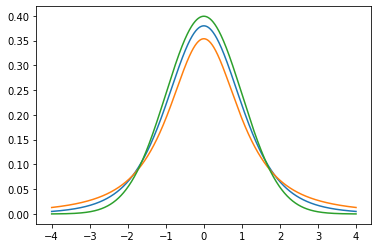

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import t,norm

x = np.linspace(-4,4,1000)
t1 = t(df = 5)
t2 = t(df = 2)
plt.plot(x,t1.pdf(x))
plt.plot(x,t2.pdf(x))
plt.plot(x,norm.pdf(x))
pass

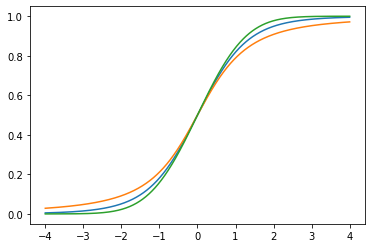

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import t,norm

x = np.linspace(-4,4,1000)
t1 = t(df = 5)
plt.plot(x,t1.cdf(x))
plt.plot(x,t2.cdf(x))
plt.plot(x,norm.cdf(x))
pass

## Confidence Intervals with t-scores (unknown $\sigma$)

$t_{\alpha}$ denotes the t-value for having $(1-\alpha)$% cumulative probability. That is, if $\alpha = 0.05$, then 95% of the curve is to the *left* of $t_{\alpha}$. Alternatively, $t_{\alpha}$ indicates the t-score with 5% of the cure to the *right*. 

Fore example, if $\alpha = 0.05$ and $df=10$, then $t_{\alpha}$ is approximately 1.812. 

In SciPy, we can use `t.ppf` (for percent point function) to obtain $t_{\alpha}$. It takes two values `alpha` and `df`. However, `alpha` in this case is actually (1-$\alpha$). So, to get $t_{0.05}$, we would actually use `t.ppf(0.95, df)`.

In [8]:
from scipy.stats import t,norm

df = 10
print(f'df:{df}')
for npalpha in [0.01,0.05,0.1,0.25, 0.5, 0.75,0.9,0.95,0.99]:
    print(f"{npalpha}:\t t_alpha: {t.ppf(npalpha,df)}, z: {norm.ppf(npalpha)}")
    
df = 100
print(f'df:{df}')
for npalpha in [0.01,0.05,0.1,0.25, 0.5, 0.75,0.9,0.95,0.99]:
    print(f"{npalpha}:\t t_alpha: {t.ppf(npalpha,df)}, z: {norm.ppf(npalpha)}")

df:10
0.01:	 t_alpha: -2.7637694574478893, z: -2.3263478740408408
0.05:	 t_alpha: -1.8124611228107341, z: -1.6448536269514729
0.1:	 t_alpha: -1.3721836411102861, z: -1.2815515655446004
0.25:	 t_alpha: -0.6998120613124291, z: -0.6744897501960817
0.5:	 t_alpha: 6.80574793290978e-17, z: 0.0
0.75:	 t_alpha: 0.6998120613124291, z: 0.6744897501960817
0.9:	 t_alpha: 1.3721836411102863, z: 1.2815515655446004
0.95:	 t_alpha: 1.8124611228107335, z: 1.6448536269514722
0.99:	 t_alpha: 2.763769457447889, z: 2.3263478740408408
df:100
0.01:	 t_alpha: -2.364217365904738, z: -2.3263478740408408
0.05:	 t_alpha: -1.6602343260657506, z: -1.6448536269514729
0.1:	 t_alpha: -1.2900747613398766, z: -1.2815515655446004
0.25:	 t_alpha: -0.6769510430082792, z: -0.6744897501960817
0.5:	 t_alpha: 6.654605374702225e-17, z: 0.0
0.75:	 t_alpha: 0.6769510430082792, z: 0.6744897501960817
0.9:	 t_alpha: 1.2900747613398769, z: 1.2815515655446004
0.95:	 t_alpha: 1.66023432606575, z: 1.6448536269514722
0.99:	 t_alpha: 2.36

We can use t-values to compute confidence intervals. To get an interval at confidence level $1−\alpha$, we actually want to use $\alpha/2$ and $𝑡_{\alpha/2}$. Why? Because $t_\alpha$ represents the cumulative probability of the curve to the *left* of $t_{\alpha}$. We need to cut off the left tail of the curve. 

So, to compute the 90% C.I., we use $𝑡_{0.05}$.

The C.I. for a sample is

*  $m \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$

where $m$ is the sample mean, $s$ the sample standard deviation, and $n$ the sample size. 

### Example

Suppose we want a 90% C.I. from a sample having values the values below.  

In [9]:
# Example: Suppose we want a 90% C.I. from a sample
# Source: Weis, Intro. Statistics 5e. 
data = np.array(
    [447, 207, 627, 430, 883, 
     313, 844, 253, 397, 214,
     217, 768, 1064, 26, 587, 
     833, 277, 805, 653, 549, 
     649, 554, 570, 223, 443])

conf = 0.9
mean =  np.mean(data)
std = np.std(data,ddof=1)
est_standard_error  = std/np.sqrt(len(data))
df = len(data)-1 # 24
alpha = (1-conf);
t_alpha2 = t.ppf(1-(alpha/2),df)

ci_lower = mean - t_alpha2*est_standard_error
ci_higher = mean + t_alpha2*est_standard_error
print("mean: ", mean)
print("std: ", std)
print("est_standard_error: ", est_standard_error)
print("df: ", df)
print("confidence level: ",conf )
print("alpha:",alpha)
print("t_alpha/2:",t_alpha2)
print("ci_lower: ", ci_lower)
print("ci_higher: ", ci_higher)
print("t_ci: ", t.interval(conf,df))


mean:  513.32
std:  262.23092876318003
est_standard_error:  52.446185752636005
df:  24
confidence level:  0.9
alpha: 0.09999999999999998
t_alpha/2: 1.7108820799094275
ci_lower:  423.590760636214
ci_higher:  603.0492393637861
t_ci:  (-1.7108820799094284, 1.7108820799094275)


### Example

Suppose we want a 90% C.I. from a sample having values the values below.  

In [10]:
# Example: Suppose we want a 90% C.I. from a sample
# Source: Weis, Intro. Statistics 5e. 
data = np.array(
    [47, 39, 62, 49, 50, 70,
     59, 53, 55, 0,  65, 63,
     53, 51, 50, 72, 45])

conf = 0.9
mean =  np.mean(data)
std = np.std(data,ddof=1)
est_standard_error  = std/np.sqrt(len(data))
df = len(data)-1 
alpha = (1-conf);
t_alpha2 = t.ppf(1-(alpha/2),df)

ci_lower = mean - t_alpha2*est_standard_error
ci_higher = mean + t_alpha2*est_standard_error
print("mean: ", mean)
print("std: ", std)
print("est_standard_error: ", est_standard_error)
print("df: ", df)
print("confidence level: ",conf )
print("alpha:",alpha)
print("t_alpha/2:",t_alpha2)
print("ci_lower: ", ci_lower)
print("ci_higher: ", ci_higher)
print("t_ci: ", t.interval(conf,df))

mean:  51.94117647058823
std:  16.083650814706584
est_standard_error:  3.9008583032109874
df:  16
confidence level:  0.9
alpha: 0.09999999999999998
t_alpha/2: 1.74588367627624
ci_lower:  45.13073163554554
ci_higher:  58.75162130563093
t_ci:  (-1.7458836762762402, 1.74588367627624)


Looking at the data, we see that it is fairly small ($<30$).  Also, there is an obvious outlier. 

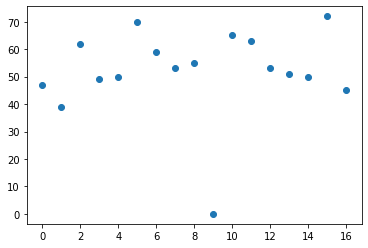

In [11]:
plt.scatter(range(len(data)),data)
pass

We can improve the data set by removing outlier data points. However, since we removed a data point, we must update our results for the example. 

In [12]:
data = np.array(
    [47, 39, 62, 49, 50, 70,
     59, 53, 55, 65, 63,
     53, 51, 50, 72, 45])

In [13]:
conf = 0.9
mean =  np.mean(data)
std = np.std(data,ddof=1)
est_standard_error  = std/np.sqrt(len(data))
df = len(data)-1 
alpha = (1-conf);
t_alpha2 = t.ppf(1-(alpha/2),df)

ci_lower = mean - t_alpha2*est_standard_error
ci_higher = mean + t_alpha2*est_standard_error
print("mean: ", mean)
print("std: ", std)
print("est_standard_error: ", est_standard_error)
print("df: ", df)
print("confidence level: ",conf )
print("alpha:",alpha)
print("t_alpha/2:",t_alpha2)
print("ci_lower: ", ci_lower)
print("ci_higher: ", ci_higher)
print("t_ci: ", t.interval(conf,df))

mean:  55.1875
std:  9.210275059229591
est_standard_error:  2.302568764807398
df:  15
confidence level:  0.9
alpha: 0.09999999999999998
t_alpha/2: 1.7530503556925547
ci_lower:  51.150981007847825
ci_higher:  59.224018992152175
t_ci:  (-1.7530503556925554, 1.7530503556925547)
